# **INTRODUCTION TO QUANTUM COMPUTING**
---
<img src="Imperial_logo.png" align = "left" width=200>
<br><br>
 
- Copyright (c) Jack Jacquier, 2025. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector
from qiskit_aer import Aer
import matplotlib.pylab as plt
from qiskit.visualization import plot_histogram
import numpy as np
import pandas as pd

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

# Constructing Quantum circuits

In [2]:
import warnings
warnings.simplefilter("ignore")

## Visualising qubits

Our general two-state qubit has the form
$$
\ket{\psi} = \cos\left(\frac{\theta}{2}\right)\ket{0} + \mathrm{e}^{\mathrm{i}\varphi}\sin\left(\frac{\theta}{2}\right)\ket{1},
$$
for some $\theta \in [0,\pi]$ and $\varphi \in [0,2\pi)$.

We use plot_bloch_vector([1,$\theta$,$\varphi$], coord_type='spherical') to plot a vector on the unit sphere (the first coordinate, set to $1$ corresponds to the length of the vector.

Example: $(\theta, \varphi) = (0,0)$, so that $\ket{\psi} = \ket{0}$.

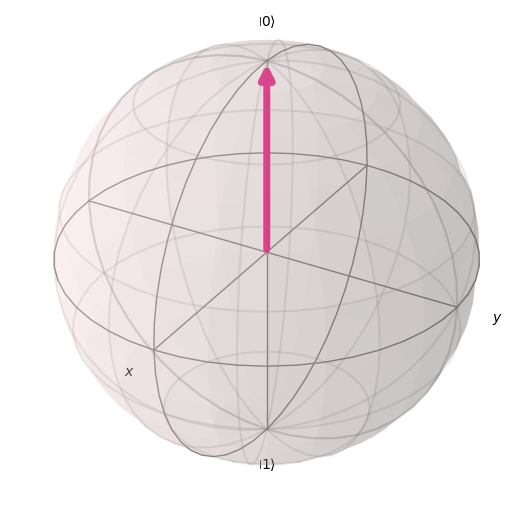

In [3]:
plot_bloch_vector([1,0,0], coord_type='spherical')

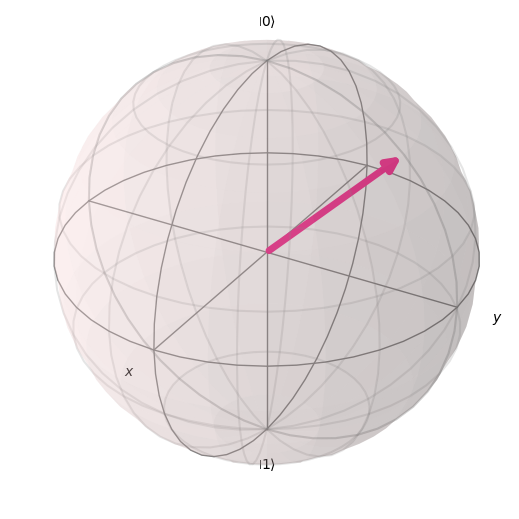

In [4]:
plot_bloch_vector([1,np.pi/4.,np.pi/2.], coord_type='spherical')

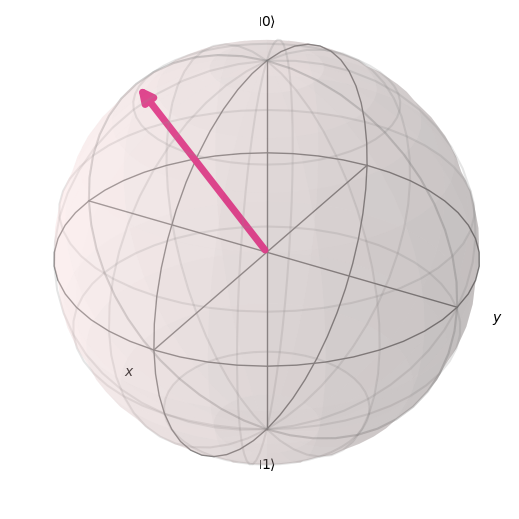

In [5]:
plot_bloch_vector([1,-np.pi/4.,np.pi/2.], coord_type='spherical')

Example: $(\theta, \varphi) = (\pi,0)$, so that $\ket{\psi} = \ket{1}$.

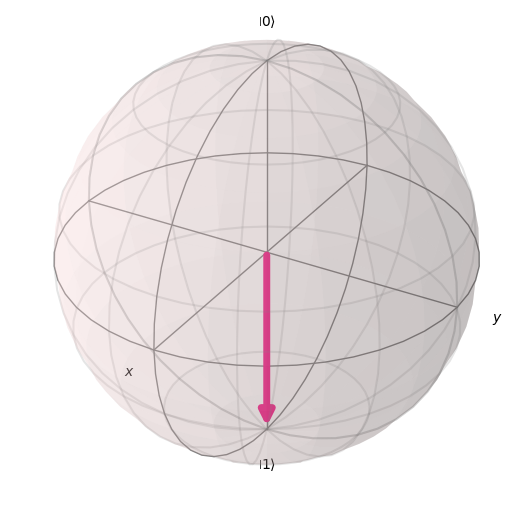

In [6]:
plot_bloch_vector([1,np.pi,0], coord_type='spherical')

Example: $(\theta, \varphi) = \left(\frac{\pi}{2},0\right)$, so that $\ket{\psi} = \frac{1}{\sqrt{2}}\Big(\ket{0}+\ket{1}\Big)$.

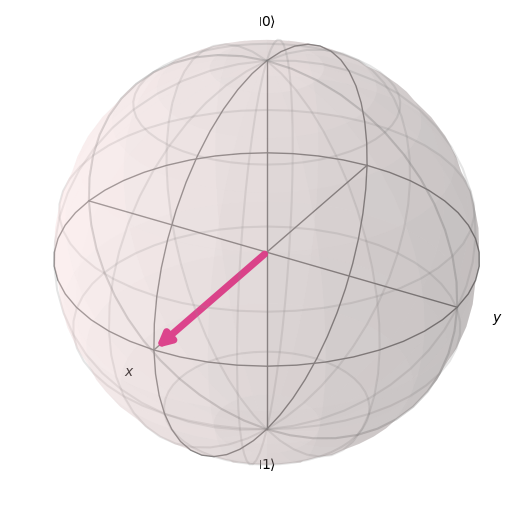

In [7]:
plot_bloch_vector([1,np.pi/2.,0], coord_type='spherical')

Example: $(\theta, \varphi) = \left(\frac{\pi}{2},\pi\right)$, so that $\ket{\psi} = \frac{1}{\sqrt{2}}\Big(\ket{0}-\ket{1}\Big)$.

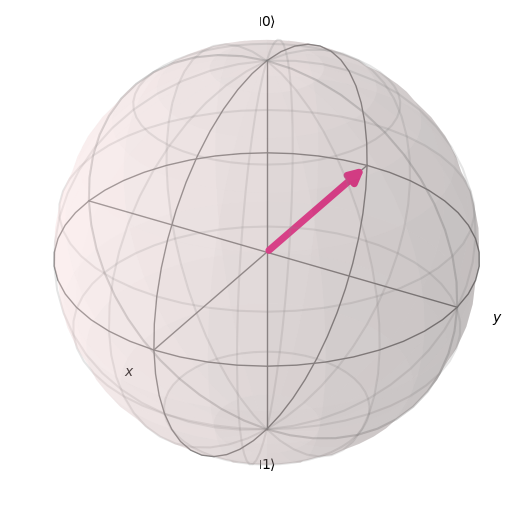

In [8]:
plot_bloch_vector([1,np.pi/2.,np.pi], coord_type='spherical')

## First example of a circuit

### One qubit with a Hadamard gate

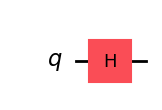

In [9]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

### Effect of two Hadamard gates

We create a one-qubit circuit with two Hadamard gates.

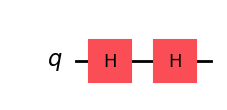

In [10]:
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw('mpl')

Recall that $\mathtt{H} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1\\ 1 & -1\end{bmatrix}$,
so that 
$$
\mathtt{H}^2
= \frac{1}{2}\begin{bmatrix} 1 & 1\\ 1 & -1\end{bmatrix}\begin{bmatrix} 1 & 1\\ 1 & -1\end{bmatrix}
 = \begin{bmatrix} 1 & 0\\ 0 & 1\end{bmatrix}
$$
is the identity matrix.

In [11]:
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(qc).result()
U = result.get_statevector(qc)
U

Statevector([1.-6.123234e-17j, 0.+6.123234e-17j],
            dims=(2,))


## Useful quantum gates
$$
\mathtt{X} = \begin{pmatrix}0 & 1\\ 1& 0\end{pmatrix},\qquad
\mathtt{Y} = \begin{pmatrix}0 & -\mathrm{i}\\ \mathrm{i}& 0\end{pmatrix},\qquad
\mathtt{Z} = \begin{pmatrix}1 & 0\\ 0& -1\end{pmatrix},\qquad
$$

## Entangling qubits

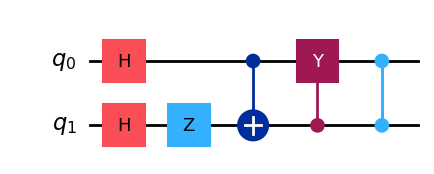

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(1)
qc.cx(0,1)
qc.cy(1,0)
qc.cz(0,1)
qc.draw('mpl')

Using a general $\mathtt{U}$ gate (see https://qiskit.org/textbook/ch-states/single-qubit-gates.html#generalU),
$$
\mathtt{U}(\phi, \theta, \lambda) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -\mathrm{e}^{\mathrm{i}\lambda}\sin\left(\frac{\theta}{2}\right)\\
\mathrm{e}^{\mathrm{i}\phi}\sin\left(\frac{\theta}{2}\right) & \mathrm{e}^{\mathrm{i}(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

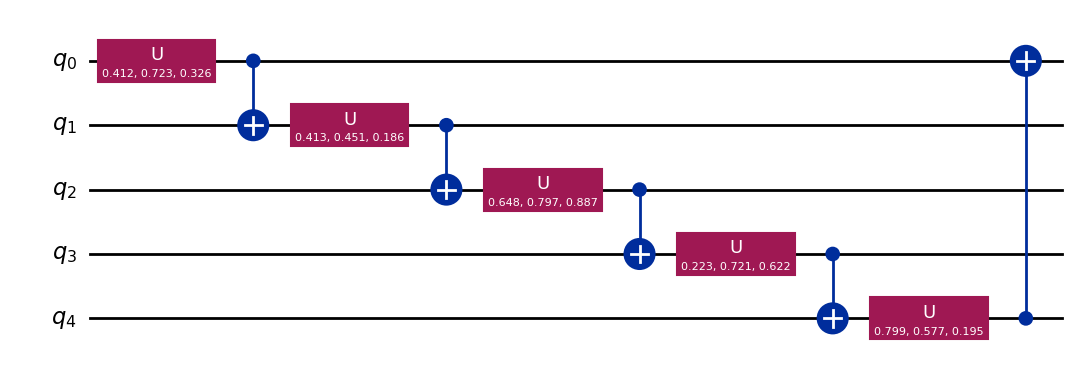

In [13]:
n = 5
qc = QuantumCircuit(n)
for i in range(n-1):
    x, y, z = np.random.rand(), np.random.rand(), np.random.rand()
    qc.u(x, y, z, i)
    qc.cx(i,i+1)
x, y, z = np.random.rand(), np.random.rand(), np.random.rand()
qc.u(x, y, z,n-1)
qc.cx(n-1,0)
qc.draw('mpl', filename = "QGAN_Entanglement.png")
#plt.savefig("QGAN_Entanglement.jpg");

## Visualising a circuit as a unitary operator

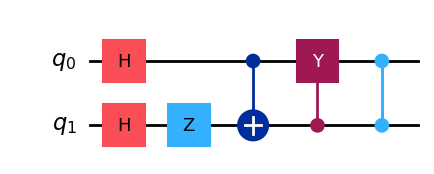

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(1)
qc.cx(0,1)
qc.cy(1,0)
qc.cz(0,1)
qc.draw('mpl')

In [15]:
simulator = Aer.get_backend('unitary_simulator')
result = simulator.run(qc).result()
U = result.get_unitary(qc)

Let's check what the matrix representing the circuit looks like:

In [16]:
pd.DataFrame(U)

,0,1,2,3
0,0.5+0.0j,0.5-0.0j,0.5-0.0j,0.5-0.0j
1,-0.5+0.0j,0.5-0.0j,0.5-0.0j,-0.5+0.0j
2,0.0-0.5j,0.0+0.5j,-0.0-0.5j,0.0+0.5j
3,0.0+0.5j,0.0+0.5j,-0.0-0.5j,-0.0-0.5j


Is it really a unitary matrix?

In [17]:
pd.DataFrame(np.round(np.matmul(U.conj().T,U), 3))

,0,1,2,3
0,1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
1,0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j
2,0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j
3,0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j


In [18]:
pd.DataFrame(np.round(np.matmul(U, U.conj().T), 3))

,0,1,2,3
0,1.0+0.0j,-0.0+0.0j,0.0-0.0j,0.0+0.0j
1,-0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0-0.0j
2,0.0+0.0j,0.0-0.0j,1.0+0.0j,-0.0+0.0j
3,0.0-0.0j,0.0+0.0j,-0.0+0.0j,1.0+0.0j


## Checking the properties of a circuit

- *Depth of a circuit*: maximum length of a directed path from input to output (may be hardware dependent)

- *width of a circuit*: maximum number of gates acting in any one time step

Width:  2
Depth:  5
Nb operators:  OrderedDict([('h', 2), ('z', 1), ('cx', 1), ('cy', 1), ('cz', 1)])
Size:  6


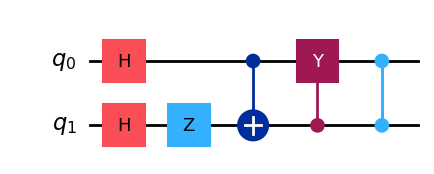

In [19]:
def circuitProperties(qc):
    print("Width: ", qc.width())
    print("Depth: ", qc.depth())
    print("Nb operators: ", qc.count_ops())
    print("Size: ", qc.size())
    
circuitProperties(qc)
qc.draw('mpl')

## Decomposition of a quantum circuit and implementable gates

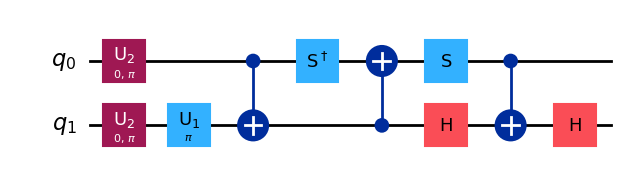

In [20]:
qc_dec = qc.decompose()
qc_dec.draw('mpl')

Here, the $\mathtt{U}_{2}$ gate is defined as
$$
\mathtt{U}_{2}(\phi, \lambda) := \mathtt{U}\left(\frac{\pi}{2}, \phi, \lambda\right),
$$
but is now deprecated in `qiskit` and $\mathtt{U}$ should be used instead.

The $\mathtt{S}$ gate is

$$
\mathtt{S} = \sqrt{\mathtt{Z}}
 = \begin{pmatrix}
1 & 0\\
0 & \mathrm{i}
\end{pmatrix}.
$$

The Hadamard gate is actually implemented as a rotation gate with angle $\pi$ and the $Y$ gate as a SWAP gate.
Indeed,
$$
\mathtt{H} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1&0\\0&-1 \end{bmatrix}
 = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 &0\\0&\mathrm{e}^{\mathrm{i}\pi} \end{bmatrix}
$$

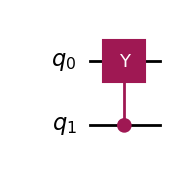

In [21]:
q = QuantumCircuit(2)
q.cy(1,0)
q.draw('mpl')

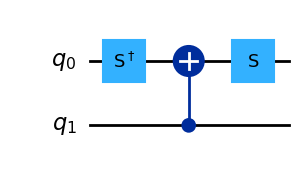

In [22]:
q.decompose().draw('mpl')

Recall that, given a unitary gate $\mathtt{U}$, we define
$$
\mathtt{R}_{\mathtt{U}}(\theta) := \exp\left\{-\frac{\mathrm{i\theta}}{2}\mathtt{U}\right\}.
$$

In particular, 
$$
\mathtt{R}_{z}(\theta) := \begin{bmatrix}\mathrm{e}^{-\mathrm{i}\frac{\theta}{2}} & 0 \\ 0 & \mathrm{e}^{\mathrm{i}\frac{\theta}{2}}\end{bmatrix},
$$

$$
\mathtt{R}_{y}(\theta) := 
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ 
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)\end{bmatrix}.
$$
and
$$
\mathtt{R}_{x}(\theta) := 
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -\mathrm{i}\sin\left(\frac{\theta}{2}\right) \\ 
-\mathrm{i}\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)\end{bmatrix}.
$$

We then define the $\mathtt{U}_{2}$ gate as
$$
\mathtt{U}_{2}(\phi,\lambda)
:= \mathtt{R}_{Z}(\phi)\cdot\mathtt{R}_{Y}\left(\frac{\pi}{2}\right)\cdot\mathtt{R}_{Z}(\lambda)
 = \frac{1}{\sqrt{2}}
 \begin{bmatrix}
 1 & \mathrm{e}^{-\mathrm{i}\lambda}\\
 -\mathrm{e}^{\mathrm{i}\phi} & \mathrm{e}^{-\mathrm{i}(\phi+\lambda)}
 \end{bmatrix}.
$$

In particular, notice that, for $\phi=0$ and $\lambda=\pi$, we have, for the right-hand side:
$$
\frac{1}{\sqrt{2}}
 \begin{bmatrix}
 1 & \mathrm{e}^{-\mathrm{i}\pi}\\
 \mathrm{e}^{0} & \mathrm{e}^{-\mathrm{i}\pi}
 \end{bmatrix}
  = \frac{1}{\sqrt{2}}
 \begin{bmatrix}
 1 & -1\\
 1 & -1
 \end{bmatrix}
   = \mathtt{H}
$$
and
\begin{align*}
\mathtt{U}_{2}(0,\pi)
 & = \begin{bmatrix}\mathrm{e}^{0} & 0 \\ 0 & \mathrm{e}^{0}\end{bmatrix}
\cdot\mathtt{R}_{Y}\left(\frac{\pi}{2}\right)\cdot
\begin{bmatrix}\mathrm{e}^{-\mathrm{i}\frac{\pi}{2}} & 0 \\ 0 & \mathrm{e}^{\mathrm{i}\frac{\pi}{2}}\end{bmatrix}\\
 & = \mathrm{I}_{2}
\cdot
\begin{bmatrix}
\cos\left(\frac{\pi}{4}\right) & -\sin\left(\frac{\pi}{4}\right) \\ 
\sin\left(\frac{\pi}{4}\right) & \cos\left(\frac{\pi}{4}\right)\end{bmatrix}
\cdot
\begin{bmatrix}-\mathrm{i} & 0 \\ 0 & \mathrm{i}
\end{bmatrix}\\
 & = 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & -1 \\ 
1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}-\mathrm{i} & 0 \\ 0 & \mathrm{i}
\end{bmatrix}
 = 
\frac{1}{\sqrt{2}}
\begin{bmatrix}-\mathrm{i} & \mathrm{i} \\ -\mathrm{i} & \mathrm{i}
\end{bmatrix}
 = 
\frac{-\mathrm{i}}{\sqrt{2}}
\begin{bmatrix}1 & -1 \\ 1 & -1
\end{bmatrix}
 = 
\frac{\mathrm{e}^{\mathrm{i}\frac{\pi}{2}}}{\sqrt{2}}
\begin{bmatrix}1 & -1 \\ 1 & -1
\end{bmatrix}
 = 
\mathrm{e}^{\mathrm{i}\frac{\pi}{2}}\mathtt{H},
\end{align*}
since $\cos\left(\frac{\pi}{4}\right) = \sin\left(\frac{\pi}{4}\right) = \frac{1}{\sqrt{2}}$.

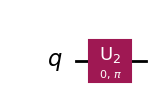

In [23]:
qc = QuantumCircuit(1)
qc.h(0)
qc_dec = qc.decompose()
qc_dec.draw('mpl')

# Running a quantum circuit on a simulator

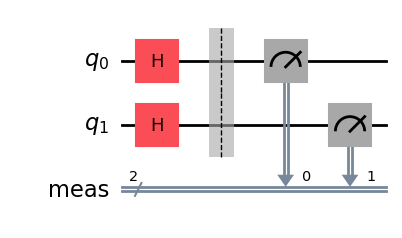

In [24]:
n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw('mpl')

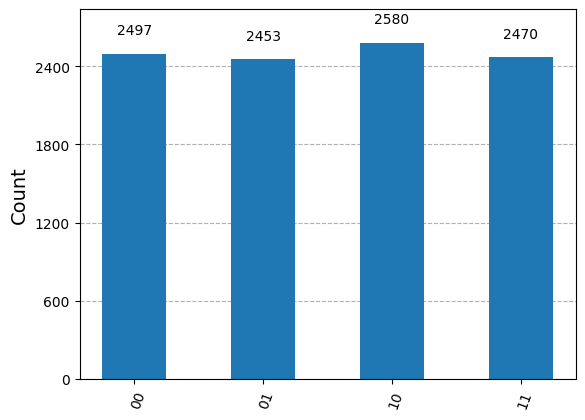

In [25]:
backend = Aer.get_backend('qasm_simulator')
shots = 10000
results = backend.run(qc, backend=backend, shots=shots).result()
plot_histogram(results.get_counts())

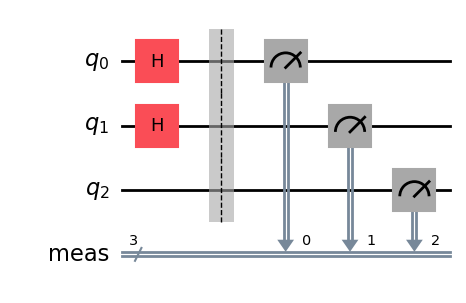

In [26]:
n = 3
qc = QuantumCircuit(n)
for i in range(n-1):
    qc.h(i)
qc.measure_all()
qc.draw('mpl')

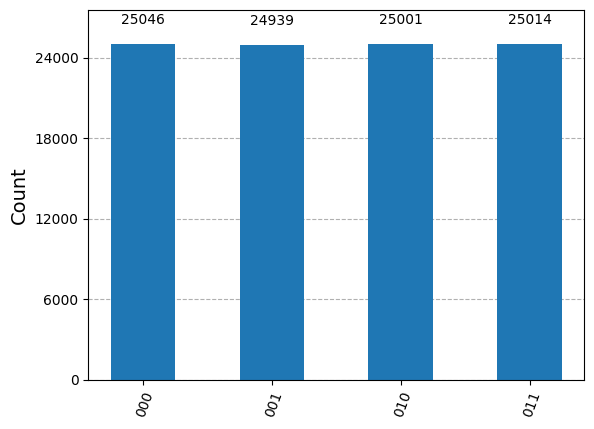

In [27]:
backend = Aer.get_backend('qasm_simulator')
shots = 100000
results = backend.run(qc, backend=backend, shots=shots).result()
plot_histogram(results.get_counts())

In [28]:
result = backend.run(qc, shots=20, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['001', '010', '000', '011', '010', '001', '011', '001', '011', '001', '010', '010', '000', '001', '011', '000', '001', '000', '010', '001']


### Visualise the output on the Bloch sphere

In [35]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

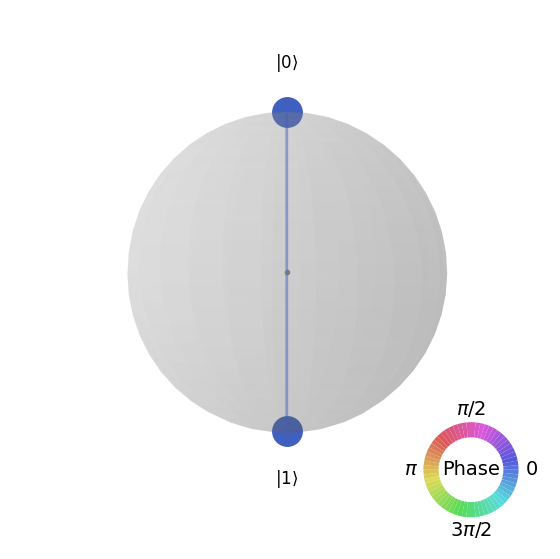

In [41]:
simulator = Aer.get_backend('statevector_simulator')
results = simulator.run(qc).result()
U = results.get_statevector(qc)
plot_state_qsphere(U)

### List of Aer backends

In [43]:
for backend in Aer.backends():
    print(backend)
print("********")


AerSimulator('aer_simulator')
AerSimulator('aer_simulator_statevector')
AerSimulator('aer_simulator_density_matrix')
AerSimulator('aer_simulator_stabilizer')
AerSimulator('aer_simulator_matrix_product_state')
AerSimulator('aer_simulator_extended_stabilizer')
AerSimulator('aer_simulator_unitary')
AerSimulator('aer_simulator_superop')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')
********


A backend is a representation of a real device or of a simulator.